# Learn about the training dataset

In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [13]:
def plot_samples(dataframe, num_of_samples):
    samples = dataframe.iloc[:num_of_samples]
    x = np.arange(0,samples.shape[1])
    plt.figure(figsize=(20,10))
    plt.plot(x, samples.T.values)


In [14]:
hourly_df = pd.read_csv('Train/Hourly-train.csv', header=0, index_col=0)
hourly_df.head()


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
V1,,,,,,,,,,,,,,,,,,,,,
H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,1713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,1108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,4227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,2275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(414, 960)


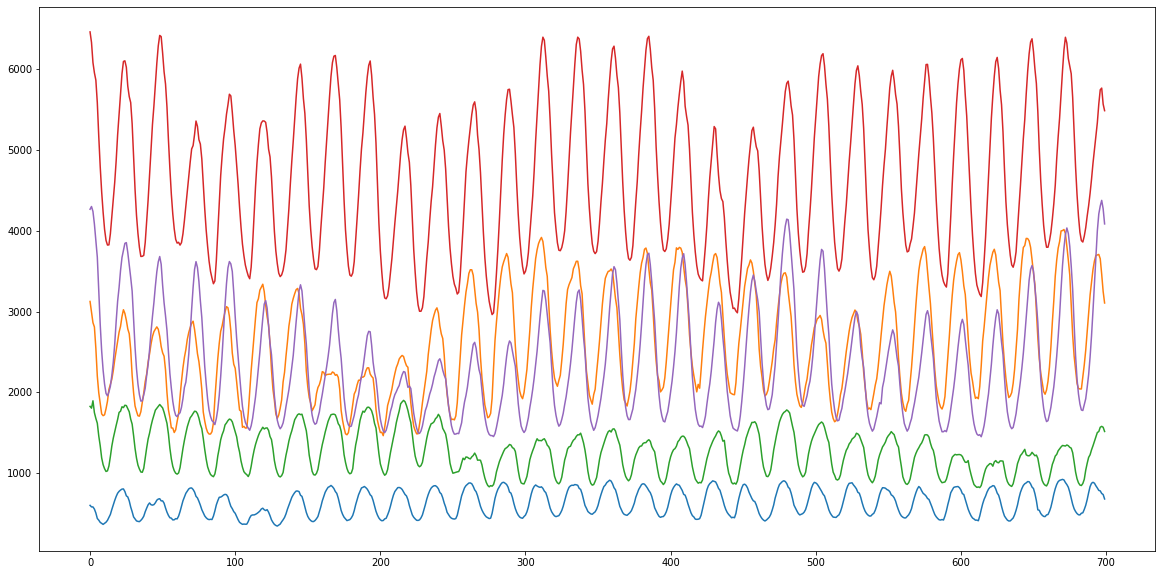

In [15]:
print(hourly_df.shape)
plot_samples(hourly_df, 5)

# learn more about the test dataset

In [16]:
hourly_df_test = pd.read_csv('Test/Hourly-test.csv', header=0, index_col=0)
hourly_df_test.head()


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
V1,,,,,,,,,,,,,,,,,,,,,
H1,619.0,565.0,532.0,495.0,481.0,467.0,473.0,488.0,501.0,534.0,...,812.0,836.0,838.0,829.0,807.0,785.0,756.0,719.0,703.0,659.0
H2,2771.0,2396.0,2189.0,1984.0,1872.0,1843.0,1828.0,1872.0,1952.0,2069.0,...,3018.0,3206.0,3356.0,3499.0,3550.0,3558.0,3488.0,3224.0,3054.0,2918.0
H3,1455.0,1376.0,1235.0,1101.0,1003.0,943.0,905.0,886.0,910.0,970.0,...,1457.0,1529.0,1627.0,1701.0,1754.0,1791.0,1819.0,1791.0,1758.0,1679.0
H4,5327.0,5051.0,4683.0,4319.0,4049.0,3847.0,3712.0,3639.0,3652.0,3758.0,...,5337.0,5675.0,5926.0,6159.0,6313.0,6072.0,5612.0,5220.0,4895.0,4793.0
H5,3823.0,3501.0,3039.0,2613.0,2312.0,2079.0,1938.0,1839.0,1821.0,1877.0,...,2345.0,2529.0,2737.0,3028.0,3292.0,3453.0,3574.0,3522.0,3338.0,3041.0


(414, 48)


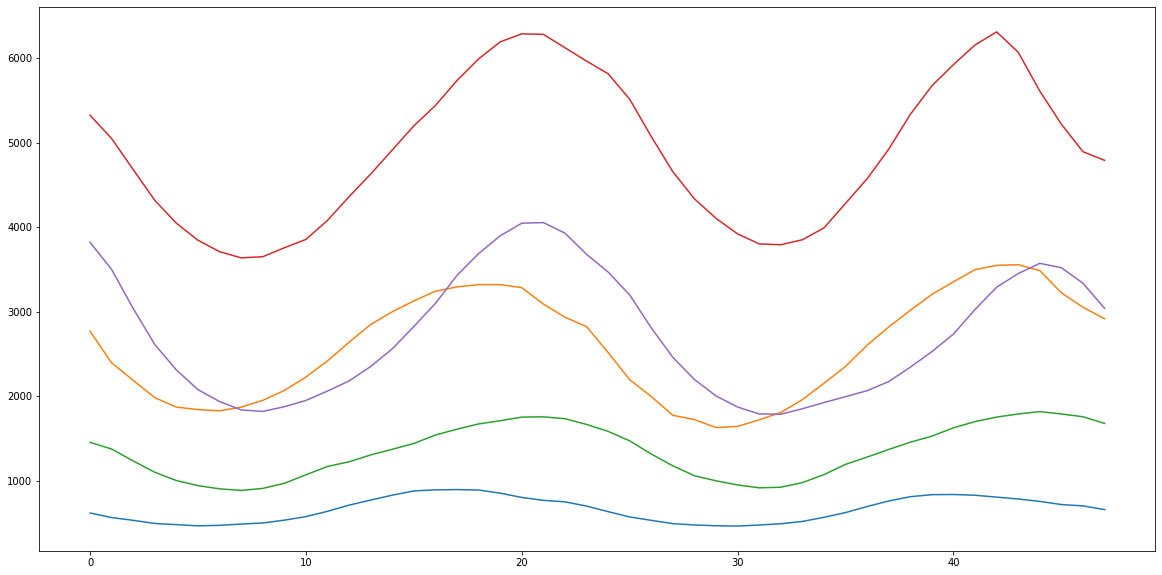

In [17]:
print(hourly_df_test.shape)
plot_samples(hourly_df_test, 5)

# Preprocessing
https://www.tensorflow.org/tutorials/structured_data/time_series

In [18]:
dataset = hourly_df.values

In [19]:
samples_num, features_num = dataset.shape
TRAIN_SPLIT = int(0.75 * samples_num)
FEATURES_SPLIT = int(0.50 * features_num)
samples_num, features_num, TRAIN_SPLIT, FEATURES_SPLIT

(414, 960, 310, 480)

# Standardize timesteps by removing the mean and scaling to unit variance

In [24]:
def standardize(train_dataset):
    scaler = StandardScaler()
    scaler.fit(train_dataset)
    standardized_train_dataset = scaler.transform(train_dataset)
    
    return standardized_train_dataset


std_dataset = standardize(dataset)


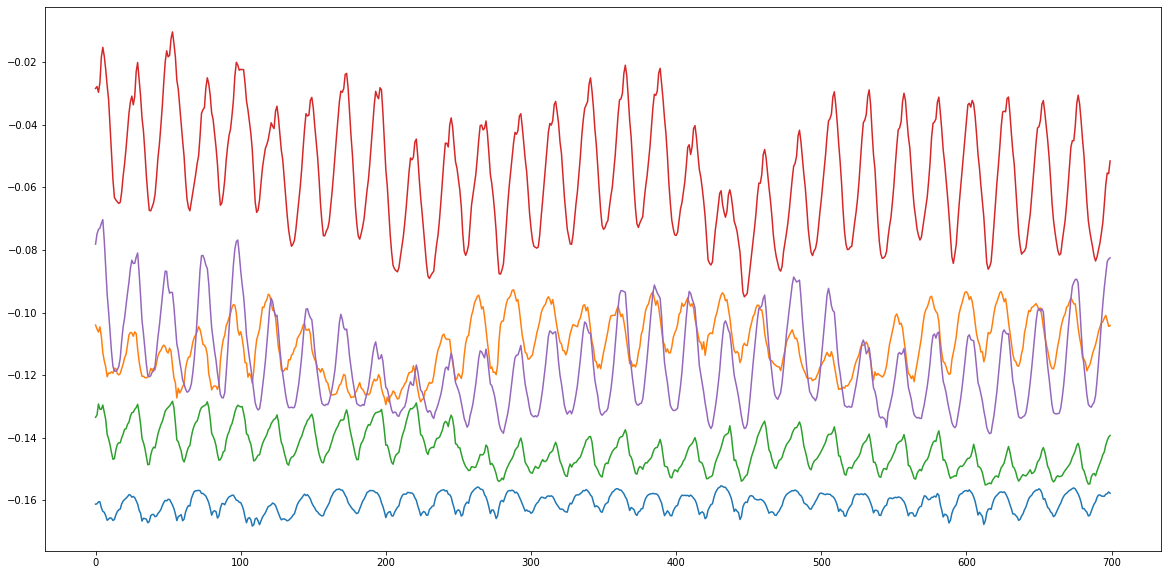

In [25]:

# Draw Five samples

samples = std_dataset
x = np.arange(0,samples.shape[1])
plt.figure(figsize=(20,10))
plt.plot(x, samples[0])
plt.plot(x, samples[1])
plt.plot(x, samples[2])
plt.plot(x, samples[3])
plt.plot(x, samples[4])



# Crop dataset to get rid of Nan values

In [31]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)


In [37]:
from numpy import *
# get the indecis of the nan values
where_are_NaNs = np.isnan(dataset)
np.argmax(where_are_NaNs)


# crop dataset
dataset = dataset[:,:700]

# replace the left nan values with zeros
where_are_NaNs = isnan(dataset)
dataset[where_are_NaNs] = 0

std_dataset_no_nan = standardize(dataset)

# shuffel rows
shuffle_along_axis(std_dataset_no_nan, axis=0)

print(std_dataset_no_nan.shape)


(414, 700)


# Split dataset

In [38]:
train_dataset = std_dataset_no_nan[0:TRAIN_SPLIT, :]
val_dataset = std_dataset_no_nan[TRAIN_SPLIT:, :]

print(std_dataset_no_nan.shape)
print(train_dataset.shape)
print(val_dataset.shape)


(414, 700)
(310, 700)
(104, 700)


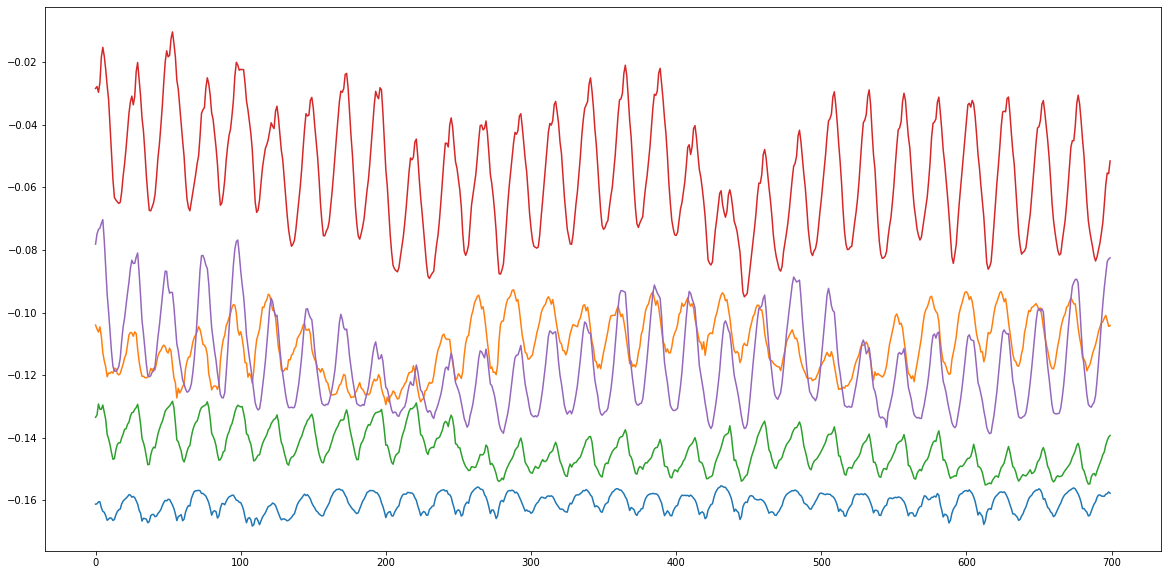

In [43]:

# Draw Five samples
samples = std_dataset_no_nan
x = np.arange(0,samples.shape[1])
plt.figure(figsize=(20,10))
plt.plot(x, samples[0])
plt.plot(x, samples[1])
plt.plot(x, samples[2])
plt.plot(x, samples[3])
plt.plot(x, samples[4])


# Split to X and Y

In [69]:

def univariate_data(dataset, start_index, end_index):
    data = []
    labels = []

    data   = dataset[:, start_index:end_index]
    labels = dataset[:, end_index:]
    
    return np.array(data), np.array(labels)

    
x_train_uni, y_train_uni = univariate_data(train_dataset, 0, FEATURES_SPLIT)
x_val_uni, y_val_uni     = univariate_data(val_dataset, 0, FEATURES_SPLIT)

print('Train')
print(x_train_uni.shape)
print(y_train_uni.shape)

print('Val')         
print(val_dataset.shape)
print(x_val_uni.shape)
print(y_val_uni.shape)  

# print ('Single window of past history')
# print (x_train_uni[0])
# print ('\n Target audience size to predict')
# print (y_train_uni[0])


Train
(310, 480)
(310, 220)
Val
(104, 700)
(104, 480)
(104, 220)


(104, 220)
(104, 700)


In [70]:
BATCH_SIZE = 25
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()


In [79]:
def create_time_steps(length, start):
    time_steps = []
    for i in range(start, length + start):
        time_steps.append(i)
        
    return time_steps

def show_plot(history, future, model_prediction,title):
    time_steps_history = create_time_steps(history.shape[0] ,start=0)
    time_steps_future  = create_time_steps(future.shape[0] , start=history.shape[0])
    time_steps_pred    = create_time_steps(model_prediction.shape[0] , start=history.shape[0])

    plt.figure(figsize=(20,10))
    plt.title(title)
    
    plt.plot(time_steps_history, history, '-', markersize=10, color = 'blue', label='History')
    plt.plot(time_steps_future , future , '-', markersize=10, color = 'red' , label='True Future')
    plt.plot(time_steps_pred, model_prediction, '-', markersize=10, color = 'green', label='Model Prediction')

    plt.legend()
    plt.xlabel('Time-Step')
    plt.ylabel('Audience Size')
    
    return plt

<module 'matplotlib.pyplot' from '/anaconda2/envs/awtpy3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

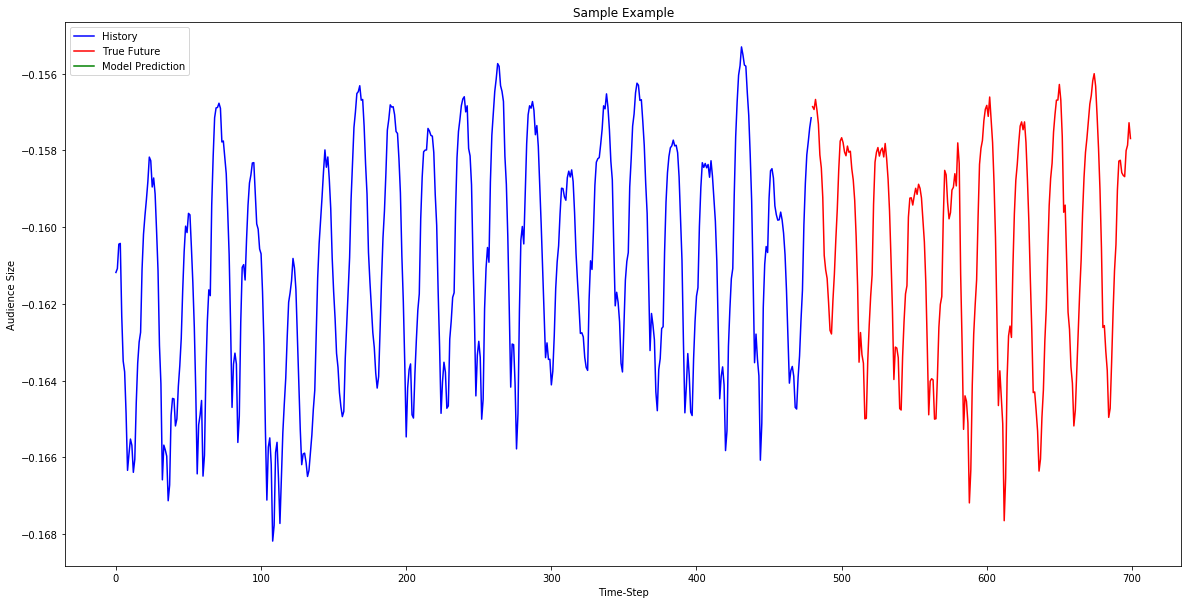

In [47]:

show_plot(x_train_uni[0], y_train_uni[0], np.array([]), 'Sample Example')


In [49]:
print(x_train_uni.shape)
print(y_train_uni.shape)

timesteps, data_dim = x_train_uni.shape[1], 1

multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(80, input_shape=(timesteps, data_dim), activation='tanh'))
                                        #  batch_input_shape=(BATCH_SIZE , x_train_uni.shape[1], 1 )))

#multi_step_model.add(tf.keras.layers.LSTM(1, activation='relu'))
                     
multi_step_model.add(tf.keras.layers.Dense(y_train_uni.shape[1]))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3, clipvalue=1.0), loss='mae')

multi_step_model.summary()

(310, 480)
(310, 220)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80)                26240     
_________________________________________________________________
dense_1 (Dense)              (None, 220)               17820     
Total params: 44,060
Trainable params: 44,060
Non-trainable params: 0
_________________________________________________________________


In [50]:
EPOCHS = 10
EVALUATION_INTERVAL=int(np.floor(len(x_train_uni)+len(x_val_uni) / float(BATCH_SIZE)))
print(EVALUATION_INTERVAL)

print(x_train_uni.shape) #(310, 1, 480)

x_train_uni = x_train_uni.reshape(x_train_uni.shape[0], x_train_uni.shape[1],1)

multi_step_history = multi_step_model.fit(x_train_uni, y_train_uni,
                                          epochs=EPOCHS,
                                          batch_size=BATCH_SIZE, 
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                         # validation_data=X_val,
                                        #  validation_steps=10
                                         )

314
(310, 480)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
314/314 [==============================] - 282s 898ms/step - loss: 0.0964
Epoch 2/10
314/314 [==============================] - 282s 897ms/step - loss: 0.0344
Epoch 3/10
314/314 [==============================] - 281s 895ms/step - loss: 0.0163
Epoch 4/10
314/314 [==============================] - 285s 908ms/step - loss: 0.0141
Epoch 5/10
314/314 [==============================] - 289s 920ms/step - loss: 0.0124
Epoch 6/10
314/314 [==============================] - 293s 932ms/step - loss: 0.0106
Epoch 7/10
314/314 [==============================] - 343s 1s/step - loss: 0.0100
Epoch 8/10
314/314 [==============================] - 303s 964ms/step - loss: 0.0093
Epoch 9/10
314/314 [==============================] - 324s 1s/step - loss: 0.0088
Epoch 10/10
314/314 [==============================] - 328s 1s/step - loss: 0.0083


In [53]:
multi_step_model.save(
    'trained_models/model',
    overwrite=True,
    include_optimizer=True
)


In [83]:
x_val_uni = x_val_uni.reshape(x_val_uni.shape[0], x_val_uni.shape[1],1)

# val (25, 220)
batch_number=int(np.floor(len(x_val_uni) / float(BATCH_SIZE)))
predicted = []
current_index = BATCH_SIZE
start_index = 0
for batch in range(0, batch_number):
    predicted.append(multi_step_model.predict(x_val_uni[start_index:current_index,:]))
    start_index = current_index
    current_index+= BATCH_SIZE
    
predicted

[array([[-0.16671836, -0.16732869, -0.16526628, ..., -0.16502029,
         -0.16561928, -0.16492406],
        [-0.16670959, -0.16733357, -0.16527641, ..., -0.16503373,
         -0.16563469, -0.16494712],
        [-0.16664343, -0.1672782 , -0.16522306, ..., -0.1649859 ,
         -0.16558692, -0.16491087],
        ...,
        [-0.16391534, -0.16348727, -0.1623841 , ..., -0.16179457,
         -0.16221887, -0.15984878],
        [-0.16671968, -0.16734245, -0.16540036, ..., -0.16513465,
         -0.16573934, -0.16494298],
        [-0.16679198, -0.16769376, -0.16571474, ..., -0.16547912,
         -0.16612741, -0.1655696 ]], dtype=float32),
 array([[-0.16608557, -0.16706774, -0.16519353, ..., -0.16504858,
         -0.16570735, -0.16523792],
        [-0.16610527, -0.16604862, -0.16422737, ..., -0.1637721 ,
         -0.1642505 , -0.16279037],
        [-0.166776  , -0.16747756, -0.16547988, ..., -0.16522455,
         -0.16584834, -0.1651721 ],
        ...,
        [-0.16635723, -0.16762267, -0.1

<module 'matplotlib.pyplot' from '/anaconda2/envs/awtpy3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

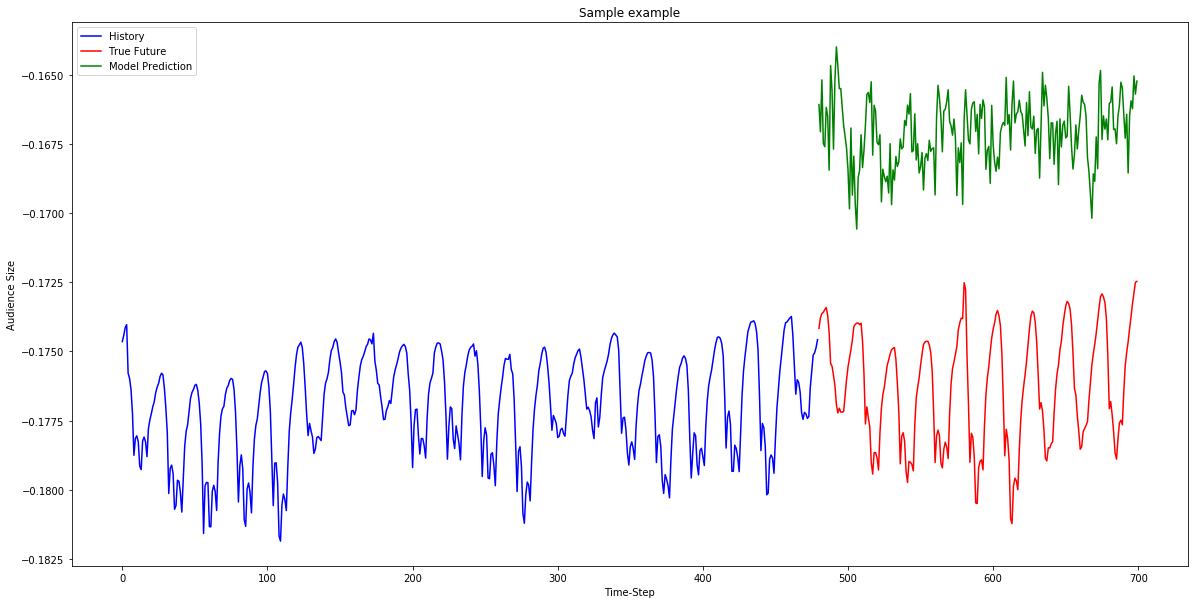

In [92]:
# plot the predition for one sample
show_plot(x_val_uni[1], y_val_uni[1], predicted[1][0], 'Sample example')


In [91]:
multi_step_model.evaluate(x_val_uni, y_val_uni, batch_size=BATCH_SIZE, verbose=0)

0.007009549917151721